# Giulia Solinas - First Assignment: Exploratory Data Analysis

- Use case: derive descriptive statistical measures & generate plots.
- Data source: https://www.kaggle.com/competitions/titanic/data


In [55]:
# Import packages

import numpy as np      # linear algebra and arrays
import pandas as pd     # data wrangling

%matplotlib inline
import matplotlib.pyplot as plt     # data visualization
import seaborn as sns               # data visualization

from scipy.stats import mode    # to create additional features
import string   # to create additional features


In [56]:
# Enabling autocompletion in the Jupyther notebook
%config IPCompleter.greedy=True

## Load data

In [57]:
from pathlib import Path
cwd        = Path.cwd()
dataFolder = Path(cwd.parent , 'data')

In [58]:
# train
df_train = pd.read_csv(Path(dataFolder, 'train.csv'))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# test
df_test = pd.read_csv(Path(dataFolder, 'test.csv'))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# gender
df_gender = pd.read_csv(Path(dataFolder, 'gender_submission.csv'))

# This dataset is not necessary for the analysis.

In [61]:
# create full dataset by appending the train and test
# NOTE: the append function will be deprecated and will be removed. In the future, use 'pandas.concat' !!!!
df_full = df_train.append(df_test, ignore_index= True)

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_36658/3295624958.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_train.append(df_test, ignore_index= True)


In [62]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In total, the combined dataset includes 1309 passengers and it is close to the official passengers' number. Exact numbers of those traveling on the Titanic is not known, but the official total of all passengers and crew is 2,229. The approximate number of passengers seems to be 1316 (see here for a list of sources: https://en.wikipedia.org/wiki/Titanic#).

The passengers' list features 1309 tickets, but not all ticket owners boarded the ship--here, for example, embarked people are 1307 .

In [63]:
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset features

The dataset provides information about passengers who were aboard the Titanic, including details about their demographics, ticket information, cabin location, and survival status. Here's an explanation of the columns in the Titanic dataset:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or did not survive (0).
- Pclass: The passenger's class of travel:
    - 1 = 1st class.
    - 2 = 2nd class.
    - 3 = 3rd class.
- Name: The name of the passenger.
- Sex: The gender of the passenger.
- Age: The age of the passenger. This column may have missing values.
- SibSp: The number of siblings or spouses traveling with the passenger.
- Parch: The number of parents or children traveling with the passenger.
- Ticket: The ticket number.
- Fare: The fare paid by the passenger.
- Cabin: The cabin number where the passenger stayed. This column may have missing values.
- Embarked: The port at which the passenger boarded the ship:
    - C = Cherbourg, a port in France.
    - Q = Queenstown, a port in Ireland.
    - S = Southampton, a port in England.

In [64]:

# TODO: cleaning data from NAs

In [65]:
# Adding features: family size, fares per person, and age per class
# Ideas to create these additional features come from the link (https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
def add_features(df_train, df_test, df_full):
    features = {
        'Family_Size': ('SibSp', 'Parch', lambda df: df['SibSp'] + df['Parch']),
        'Fare_Per_Person': ('Fare', 'Family_Size', lambda df: df['Fare'] / (df['Family_Size'] + 1)),
        'Age_Class': ('Age', 'Pclass', lambda df: df['Age'] * df['Pclass'])
    }

    for df in [df_train, df_test, df_full]:
        for feature, (col1, col2, func) in features.items():
            df[feature] = func(df)

    return df_train, df_test, df_full

# The code above makes the calculation into a single loop and utilizes a dictionary to store the column calculations.


In [66]:
df_train, df_test, df_full = add_features(df_train, df_test, df_full)


In [67]:
# The same result can be also achieved with the following loop
# for df in [df_train, df_test]:
#     addfeature(df)

In [68]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1046 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  Family_Size      1309 non-null   int64  
 13  Fare_Per_Person  1308 non-null   float64
 14  Age_Class        1046 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 153.5+ KB


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    object 
 4   Age              332 non-null    float64
 5   SibSp            418 non-null    int64  
 6   Parch            418 non-null    int64  
 7   Ticket           418 non-null    object 
 8   Fare             417 non-null    float64
 9   Cabin            91 non-null     object 
 10  Embarked         418 non-null    object 
 11  Family_Size      418 non-null    int64  
 12  Fare_Per_Person  417 non-null    float64
 13  Age_Class        332 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 45.8+ KB


## Understanding the data

In [70]:
df_full.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


We encode the variable `'Embarked'` as we want to check if there is a correlation with the passengers' social status and the port where they embarked.

In [71]:
df_full = pd.get_dummies(df_full, columns=['Embarked'], prefix='Embarked', drop_first=True)
# df_train = pd.get_dummies(df_full, columns=['Embarked'], prefix='Embarked', drop_first=True)
# df_test = pd.get_dummies(df_full, columns=['Embarked'], prefix='Embarked', drop_first=True)

print(df_full.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Family_Size  Fare_Per_Person  \
0      0         A/5 21171   7.2500   NaN            1          3.62500   
1      0          PC 17599  71.2833   C85            1         35.64165   
2      0  STON/O2. 3101282   7.9250   NaN            0          7.92500   
3      0            

In [72]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked', drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked', drop_first=True)

## Imputing NAs
Work by making assumptions on the median age per class.

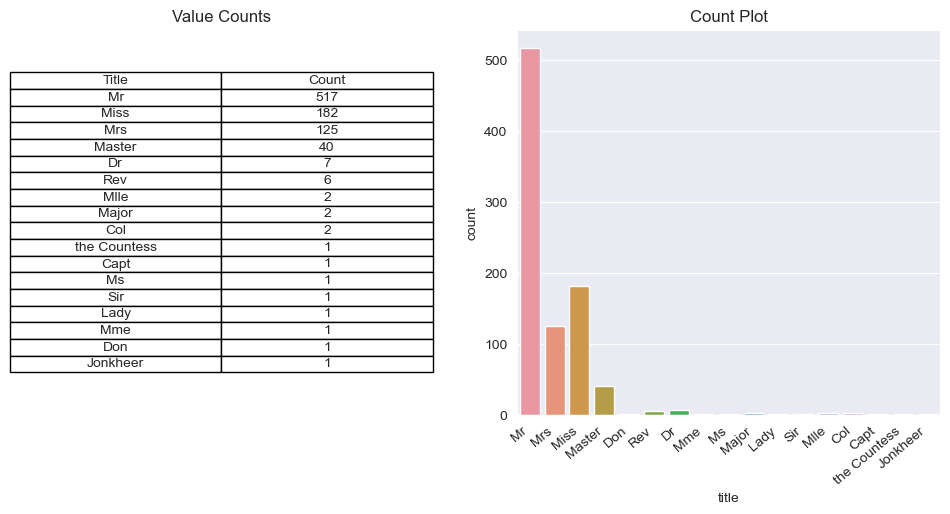

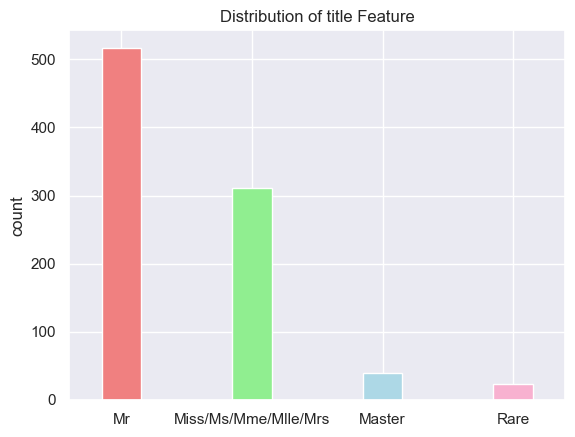

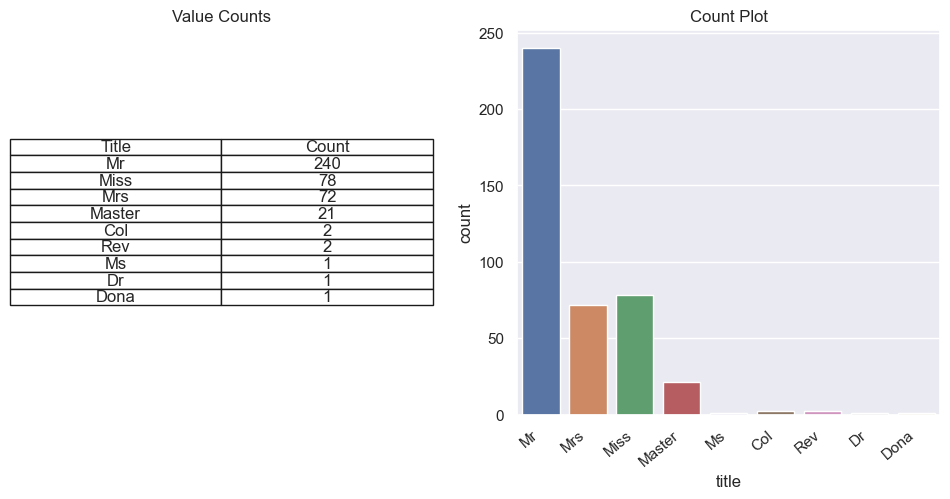

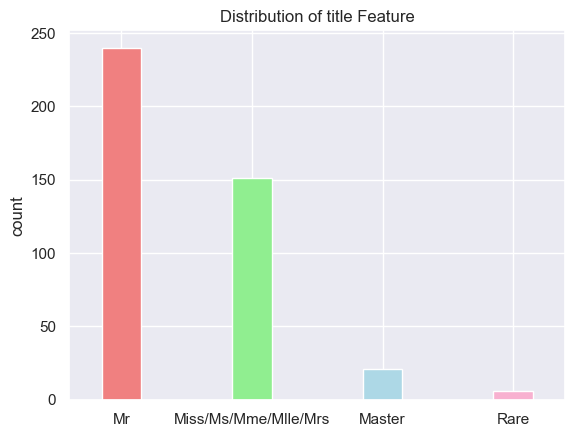

In [73]:
def preprocess_and_visualize_titles(data):
    # Splitting the Name column and extracting titles
    title = [i.split(',')[1].split('.')[0].strip() for i in data['Name']]
    data['title'] = pd.Series(title)

    # Calculate value counts
    value_counts = data['title'].value_counts()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: Text Display of Value Counts as a Table
    cell_text = [[title, count] for title, count in value_counts.items()]
    ax1.table(cellText=cell_text, colLabels=['Title', 'Count'], cellLoc='center', loc='center')
    ax1.axis('off')  # Turn off axes for text output
    ax1.set_title('Value Counts')

    # Subplot 2: Count Plot as Bar Plot
    sns.countplot(data=data, x='title', ax=ax2)
    ax2.set_title('Count Plot')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha='right')

    plt.show()

    # Replacing titles according to specified rules
    data["title"] = data["title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')

    # Plot distribution of title feature after replacement
    sns.set_theme(style="darkgrid")
    custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
    data['title'].value_counts().plot(kind='bar', color=custom_palette, width=0.3)
    plt.title('Distribution of title Feature')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('count')
    plt.show()

    return data

# Apply the function to both df_train_df,  df_test_df
df_train = preprocess_and_visualize_titles(df_train.copy())
df_test = preprocess_and_visualize_titles(df_test.copy())

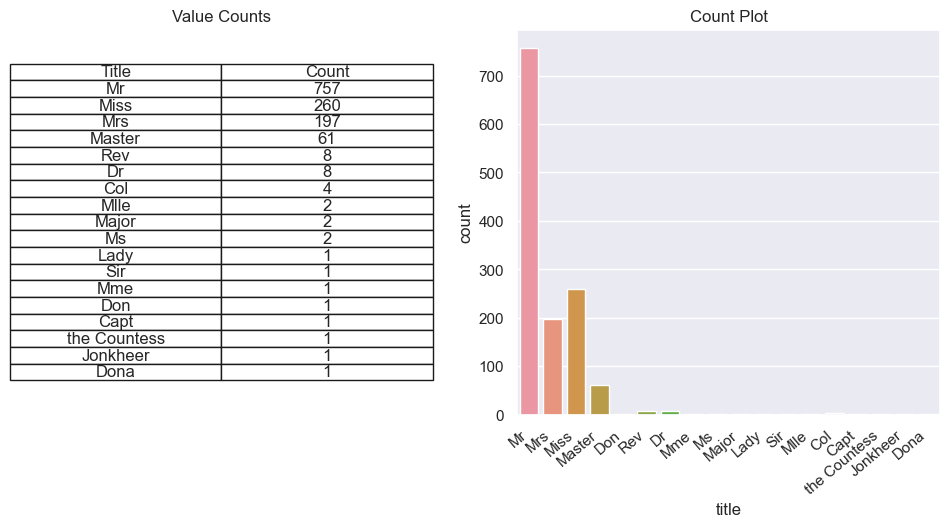

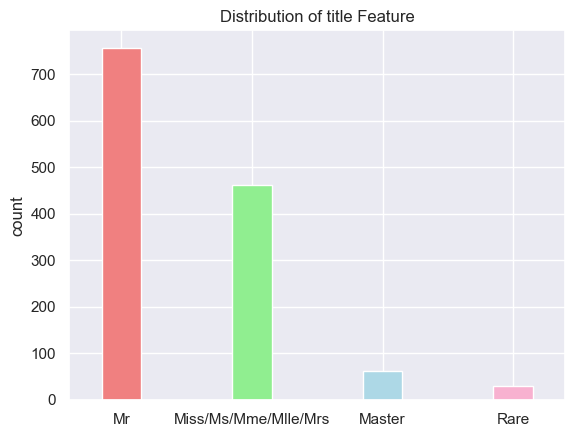

In [74]:
# applying function to df_full

df_full = preprocess_and_visualize_titles(df_full.copy())

In [ ]:
# Here you can simplify the code by creating a a loop that iterates over the three datasets: check this link https://stackoverflow.com/questions/62146760/pandas-modify-multiple-dataframes-in-a-loop

df_full = pd.DataFrame(df_full)

df_test = pd.DataFrame(df_test)


# filling age column according to the passenger data with title based median:

# train_df.loc[(train_df['title'] == 'Mr') & (train_df['Age'].isnull()), 'Age'] = train_df[train_df['title'] == 'Mr']['Age'].median()
# train_df.loc[(train_df['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (train_df['Age'].isnull()), 'Age'] = train_df[train_df['title'] == 'Miss/Ms/Mme/Mlle/Mrs']['Age'].median()
# train_df.loc[(train_df['title'] == 'Master') & (train_df['Age'].isnull()), 'Age'] = train_df[train_df['title'] == 'Master']['Age'].median()
# train_df.loc[(train_df['title'] == 'Rare') & (train_df['Age'].isnull()), 'Age'] = train_df[train_df['title'] == 'Rare']['Age'].median()

## Creating summary tables

## Creating summary graphs